# Summary of EDA

This notebook contains a list of Python methods that were introduced in the EDA programming exercises.

### Import the libraries

In [3]:
import numpy as np
import pandas as pd

### Data frames


In [4]:
df = pd.DataFrame({'A': [1, 2, 3, 4], 'B': ['one', 'two', 'three', 'four'], 'C': [False, True, False, True]})
df

,A,B,C
0,1,one,False
1,2,two,True
2,3,three,False
3,4,four,True


In [5]:
df.shape

(4, 3)

In [6]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [7]:
df.columns

Index(['A', 'B', 'C'], dtype='object')

In [8]:
df.dtypes

A     int64
B    object
C      bool
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       4 non-null      int64 
 1   B       4 non-null      object
 2   C       4 non-null      bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 196.0+ bytes


### `Index` and `Series` objects

In [10]:
names = ['Peter', 'Anna', 'Tom', 'John', 'Simone']
years = [ 1998, 2002, 1946, 1973, 1962 ]

In [11]:
se_years = pd.Series( years, index=names, name='Years of birth' )
se_years

Peter     1998
Anna      2002
Tom       1946
John      1973
Simone    1962
Name: Years of birth, dtype: int64

### Types

In [12]:
type(df) 

pandas.core.frame.DataFrame

In [13]:
type(df['C']) 

pandas.core.series.Series

In [14]:
df.dtypes['C']

dtype('bool')

In [15]:
type(se_years)

pandas.core.series.Series

### Getting data from a `DataFrame`

In [16]:
df['B']

0      one
1      two
2    three
3     four
Name: B, dtype: object

In [17]:
df.loc[2]

A        3
B    three
C    False
Name: 2, dtype: object

In [18]:
df['B'][2]

'three'

In [19]:
df.loc[2, 'B']

'three'

In [20]:
df.loc[1:2]

,A,B,C
1,2,two,True
2,3,three,False


In [21]:
df.loc[:]

,A,B,C
0,1,one,False
1,2,two,True
2,3,three,False
3,4,four,True


In [22]:
df.head(2)

,A,B,C
0,1,one,False
1,2,two,True


In [23]:
df.loc[:, 'A':'B']

,A,B
0,1,one
1,2,two
2,3,three
3,4,four


In [24]:
df.loc[1:2, 'A':'B']

,A,B
1,2,two
2,3,three


In [25]:
df.loc[[1, 3]]

,A,B,C
1,2,two,True
3,4,four,True


In [26]:
df[['A', 'C']]

,A,C
0,1,False
1,2,True
2,3,False
3,4,True


In [27]:
df.loc[:, ['A', 'C']]

,A,C
0,1,False
1,2,True
2,3,False
3,4,True


In [28]:
df[['B']]

,B
0,one
1,two
2,three
3,four


### Modifying a `DataFrame`


In [29]:
df.loc[0, 'B'] = 'ACE'
df

,A,B,C
0,1,ACE,False
1,2,two,True
2,3,three,False
3,4,four,True


In [30]:
df_slice = df.loc[1:2].copy()
df_slice.loc[1, 'A'] = 8
df_slice.loc[1, 'B'] = "EIGHT"
df_slice

,A,B,C
1,8,EIGHT,True
2,3,three,False


### Setting the index of a `DataFrame`


In [31]:
df_index = df.set_index('B')

In [32]:
df_index.loc['two':'four']

,A,C
B,,
two,2,True
three,3,False
four,4,True


In [33]:
df_index.loc['three', 'C'] = True
df_index

,A,C
B,,
ACE,1,False
two,2,True
three,3,True
four,4,True


### Reading data from a file into a `DataFrame`

In [34]:
country_data = pd.read_csv('../datasets/country.csv')
country_data.head()

,name,alpha_3,tld,continent,capital,area,population
0,Andorra,AND,.ad,EU,Andorra la Vella,468.0,84000
1,United Arab Emirates,ARE,.ae,AS,Abu Dhabi,82880.0,4975593
2,Afghanistan,AFG,.af,AS,Kabul,647500.0,29121286
3,Antigua and Barbuda,ATG,.ag,NM,St. John's,443.0,86754
4,Anguilla,AIA,.ai,NM,The Valley,102.0,13254


### Summary statistics


In [35]:
country_data.describe()

,area,population
count,2.510000e+02,2.510000e+02
mean,5.972518e+05,2.734232e+07
std,1.908368e+06,1.166406e+08
min,0.000000e+00,0.000000e+00
25%,1.096000e+03,1.839045e+05
50%,6.458900e+04,4.252277e+06
75%,3.674280e+05,1.539375e+07
max,1.710000e+07,1.330044e+09


In [36]:
country_data.describe(include='all')

,name,alpha_3,tld,continent,capital,area,population
count,251,251,249,251,245,2.510000e+02,2.510000e+02
unique,251,251,247,7,244,NaN,NaN
top,Hungary,GRL,.gp,AF,Kingston,NaN,NaN
freq,1,1,3,58,2,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,5.972518e+05,2.734232e+07
std,NaN,NaN,NaN,NaN,NaN,1.908368e+06,1.166406e+08
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,1.096000e+03,1.839045e+05
50%,NaN,NaN,NaN,NaN,NaN,6.458900e+04,4.252277e+06
75%,NaN,NaN,NaN,NaN,NaN,3.674280e+05,1.539375e+07


In [37]:
country_data[['area', 'population']].sum()

area          1.499102e+08
population    6.862922e+09
dtype: float64

In [38]:
country_data.count()

name          251
alpha_3       251
tld           249
continent     251
capital       245
area          251
population    251
dtype: int64

In [39]:
country_data.sum()

name          AndorraUnited Arab EmiratesAfghanistanAntigua ...
alpha_3       ANDAREAFGATGAIAALBARMAGOATAARGASMAUTAUSABWALAA...
continent     EUASASNMNMEUASAFANSMOCEUOCNMEUASEUNMASEUAFEUAS...
area                                               149910189.69
population                                           6862921926
dtype: object

In [40]:
country_data.mean()

area          5.972518e+05
population    2.734232e+07
dtype: float64

In [41]:
country_data.std()

area          1.908368e+06
population    1.166406e+08
dtype: float64

In [42]:
country_data.min()

name          Afghanistan
alpha_3               ABW
continent              AF
area                  0.0
population              0
dtype: object

In [43]:
country_data.max()

name            Zimbabwe
alpha_3              ZWE
continent             SM
area          17100000.0
population    1330044000
dtype: object

In [44]:
country_data.median()

area            64589.0
population    4252277.0
dtype: float64

In [45]:
country_data.quantile(0.25)

area            1096.0
population    183904.5
Name: 0.25, dtype: float64

### Sorting a `DataFrame`


In [46]:
country_data.sort_values(by='area');

In [47]:
country_data.sort_values(by='area', ascending=False);

In [48]:
country_data.sort_values(by=['continent', 'name']);

In [49]:
country_data_sorted_by_pop = country_data.sort_values(by='population', ascending=False).reset_index()

### Computing values from a `DataFrame`

In [50]:
country_data['population'] / country_data['area'];

In [51]:
country_data['density'] = country_data['population'] / country_data['area']

In [52]:
countries_in_EU = country_data['continent'] == 'EU'

### Selecting rows by boolean masks

In [53]:
country_data[countries_in_EU];

In [54]:
country_data[country_data['tld'] == '.nl'];

In [55]:
country_data[country_data['tld'].isnull()];

In [56]:
country_data[(country_data['population'] < 1000000) & (country_data['area'] > 100000)];

### Grouping rows in a `DataFrame`

In [57]:
grouped = country_data.groupby('continent')

In [58]:
grouped.groups;

In [59]:
grouped['area'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,58.0,5.234534e+05,5.956923e+05,374.00,31796.25,270933.5,819461.0,2381740.0
AN,5.0,2.802439e+06,6.259628e+06,49.00,412.00,3903.0,7829.0,14000000.0
AS,52.0,6.077544e+05,1.454325e+06,14.00,20032.50,143550.0,494575.0,9596960.0
EU,53.0,4.354706e+05,2.338187e+06,0.44,9250.00,51129.0,131940.0,17100000.0
NM,42.0,5.836313e+05,2.134253e+06,21.00,278.50,857.0,43485.0,9984670.0
OC,27.0,3.156854e+05,1.476550e+06,0.00,190.15,549.0,13603.5,7686850.0
SM,14.0,1.272751e+06,2.207496e+06,12173.00,185907.50,581850.0,1128827.5,8511965.0


In [60]:
grouped[['population', 'area']].sum()

,population,area
continent,,
AF,1016879730,30360296.00
AN,170,14012193.00
AS,4130586341,31603228.70
EU,739141025,23079944.09
NM,540105043,24512514.00
OC,36066049,8523505.90
SM,400143568,17818508.00


### Deleting rows or columns from a `DataFrame`

In [61]:
df = pd.DataFrame({'A': [1, 2, 3, 4], 'B': ['one', 'two', 'three', 'four'], 'C': [False, True, False, True]})
df

,A,B,C
0,1,one,False
1,2,two,True
2,3,three,False
3,4,four,True


In [62]:
df.drop(1)

,A,B,C
0,1,one,False
2,3,three,False
3,4,four,True


In [63]:
df.drop('C', axis=1)

,A,B
0,1,one
1,2,two
2,3,three
3,4,four


In [64]:
country_data.drop(country_data[countries_in_EU].index);

### Persisting the modifications


In [65]:
df_drop = df.drop('C', axis=1)
df_drop

,A,B
0,1,one
1,2,two
2,3,three
3,4,four


In [66]:
df_drop.loc[1, 'B'] = 'EIGHT'
df_drop

,A,B
0,1,one
1,2,EIGHT
2,3,three
3,4,four


In [67]:
df.drop([1, 3], inplace=True)  # drop rows with index labels 1 and 3, modifying df in place
df

,A,B,C
0,1,one,False
2,3,three,False


### Plotting a `DataFrame`

In [68]:
# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # set Seaborn defaults
plt.rcParams['figure.figsize'] = 10, 5  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

### Line plot


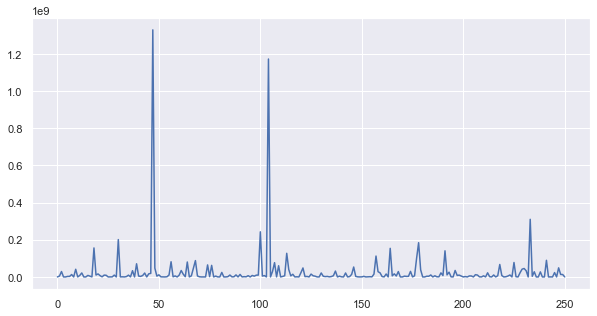

In [69]:
country_data['population'].plot();

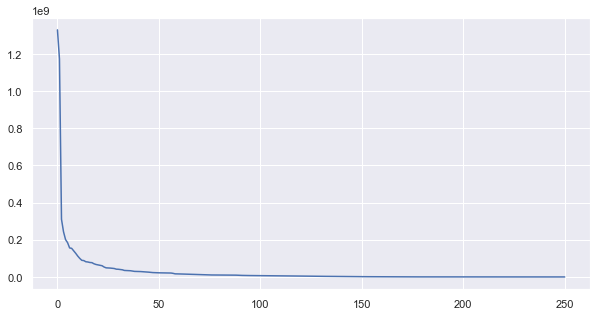

In [70]:
country_data_sorted_by_pop['population'].plot();

### Area plot


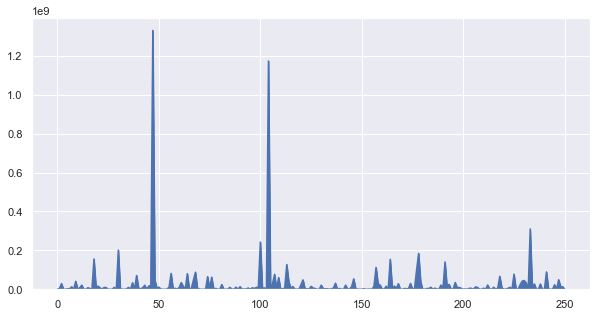

In [71]:
country_data['population'].plot(kind='area');

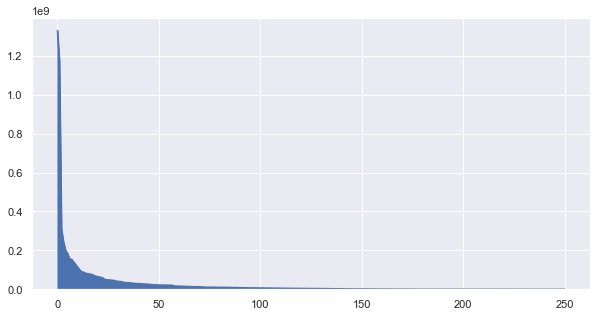

In [72]:
country_data_sorted_by_pop['population'].plot(kind='area');

### Dot plot


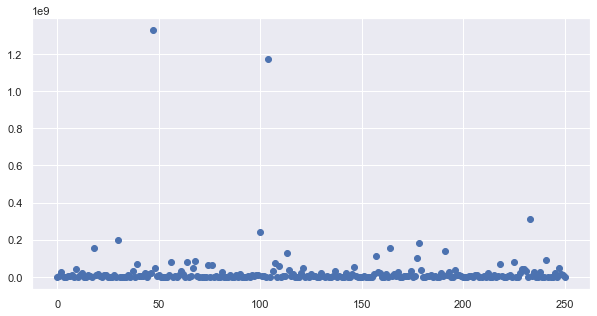

In [73]:
country_data['population'].plot(marker="o", linestyle='');

### Histogram


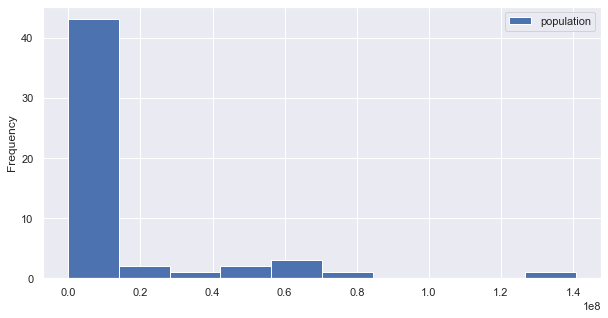

In [74]:
country_data[countries_in_EU][['population']].plot(kind='hist');

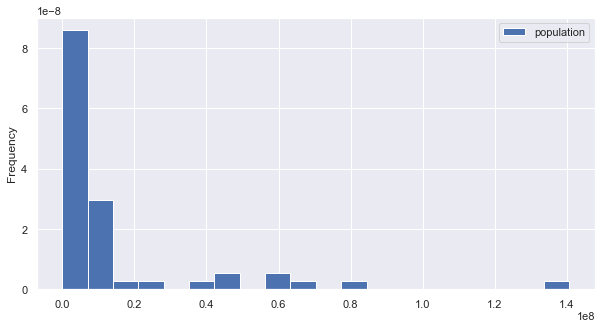

In [75]:
country_data[countries_in_EU][['population']].plot(kind='hist', bins=20, density=True);

### Density plot


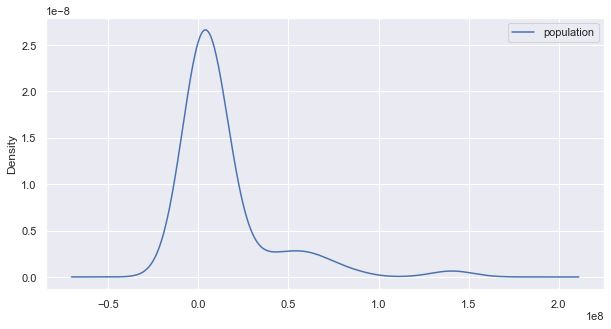

In [76]:
country_data[countries_in_EU][['population']].plot(kind='density');

### Box plot


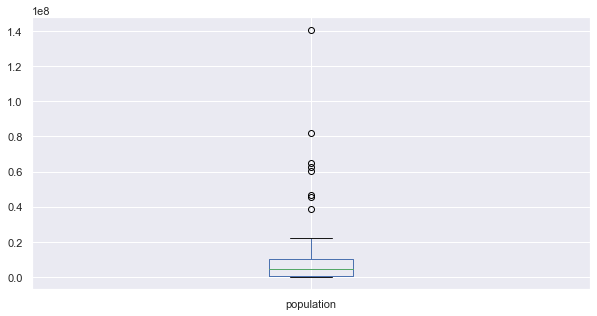

In [77]:
country_data[countries_in_EU][['population']].plot(kind='box');

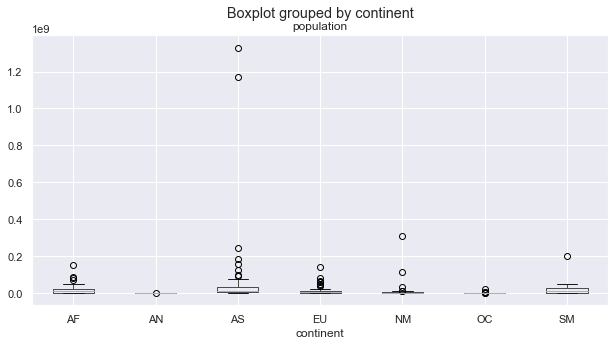

In [78]:
country_data.boxplot(column='population', by='continent');

### Bar plot


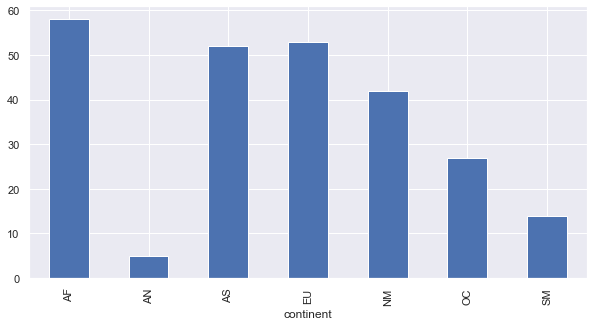

In [79]:
grouped['continent'].count().plot(kind='bar');

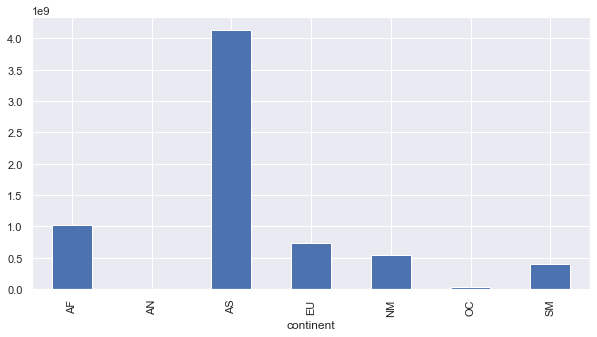

In [80]:
grouped['population'].sum().plot(kind='bar');

### Scatter plot


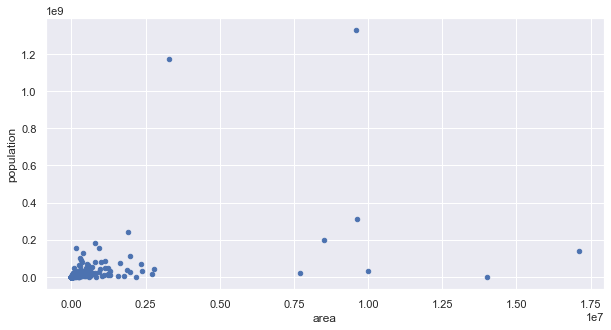

In [81]:
country_data.plot(kind='scatter', x='area', y='population', c="b");